In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [5]:
# Load summary stats
summary_pid = pd.read_csv("statistics/results_pid_nominal_aggregated.csv")
summary_onoff = pd.read_csv("statistics/results_onoff_nominal_aggregated.csv")
summary_fuzzy = pd.read_csv("statistics/results_fuzzy_nominal_aggregated.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("statistics/results_pid_nominal_all.csv" )
results_onoff = pd.read_csv("statistics/results_onoff_nominal_all.csv")
results_fuzzy = pd.read_csv("statistics/results_fuzzy_nominal_all.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results = pd.concat([results_pid, results_onoff, results_fuzzy])



In [3]:
palette = {'PID': 'skyblue', 'ON/OFF': 'salmon', 'Fuzzy': 'lightgreen'}


  controller  run              metric     value
0        PID    0  steady_state_error  0.040790
1        PID    1  steady_state_error  0.051176
2        PID    2  steady_state_error -0.150232
3        PID    3  steady_state_error -0.039437
4        PID    4  steady_state_error -0.143795


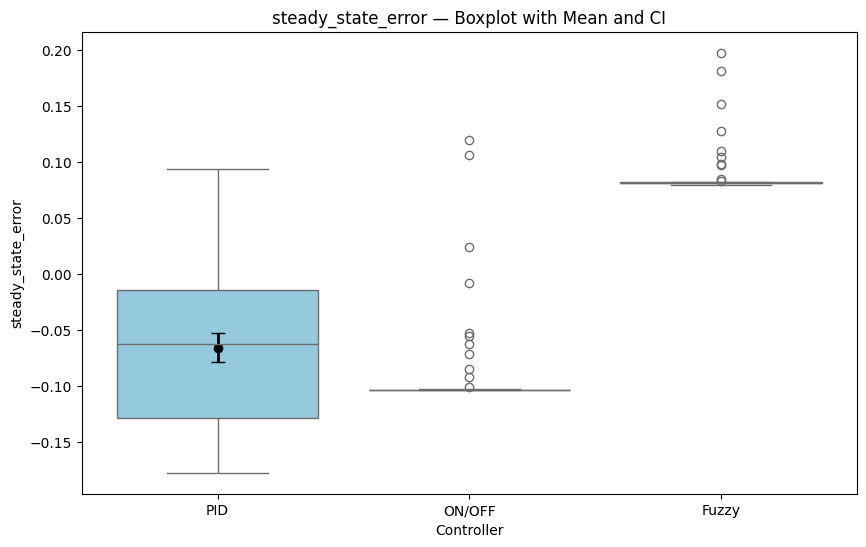

    controller  run             metric     value
100        PID    0  mean_square_error  0.262003
101        PID    1  mean_square_error  0.249387
102        PID    2  mean_square_error  0.325730
103        PID    3  mean_square_error  0.289868
104        PID    4  mean_square_error  0.326327


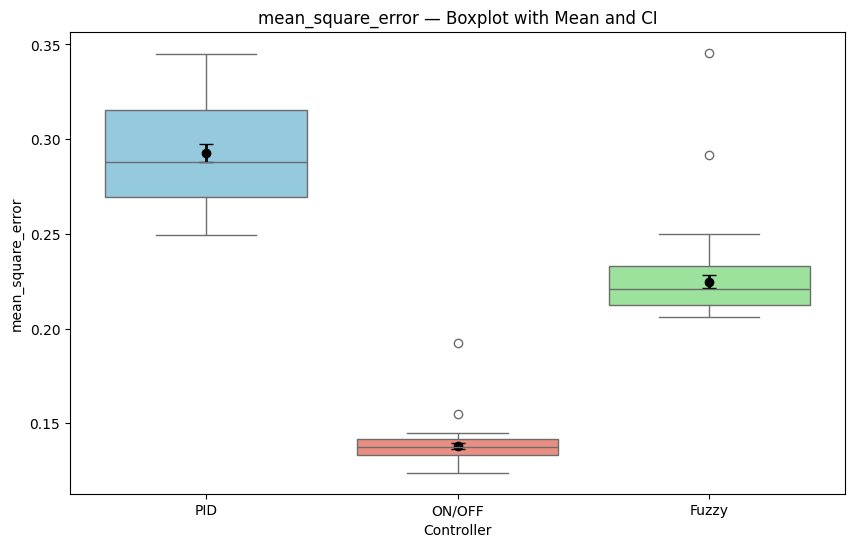

    controller  run     metric     value
200        PID    0  overshoot  0.141923
201        PID    1  overshoot  0.142629
202        PID    2  overshoot -0.069994
203        PID    3  overshoot  0.061927
204        PID    4  overshoot -0.047508


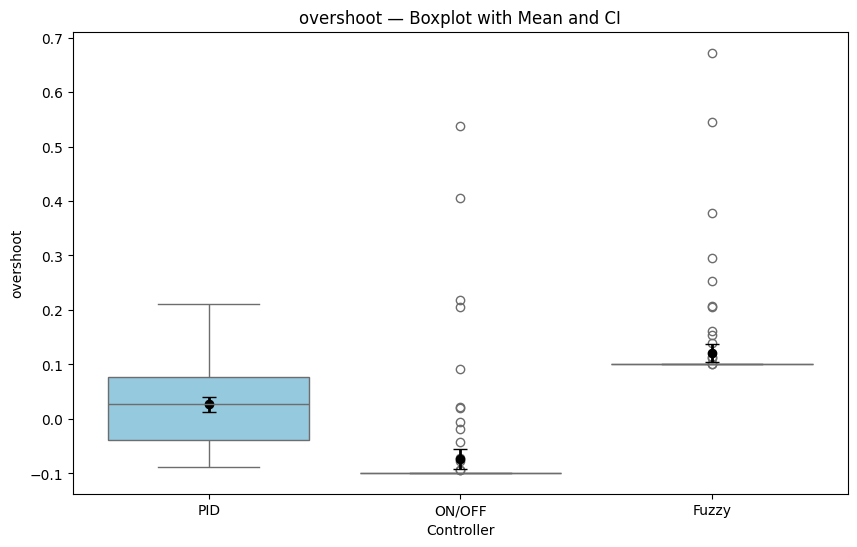

    controller  run     metric   value
300        PID    0  rise_time  3201.0
301        PID    1  rise_time  2973.0
302        PID    2  rise_time  4602.0
303        PID    3  rise_time  3864.0
304        PID    4  rise_time  4651.0


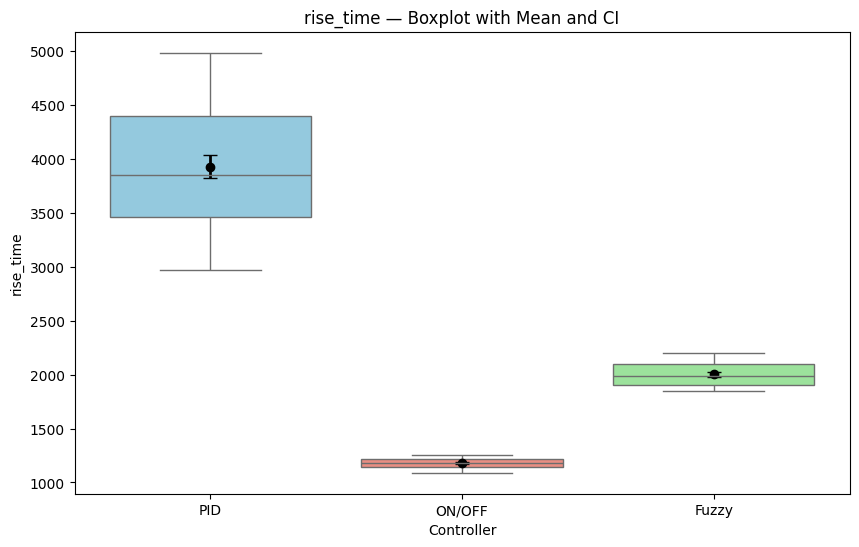

    controller  run         metric   value
400        PID    0  settling_time  2463.0
401        PID    1  settling_time  2315.0
402        PID    2  settling_time  3256.0
403        PID    3  settling_time  2877.0
404        PID    4  settling_time  3278.0


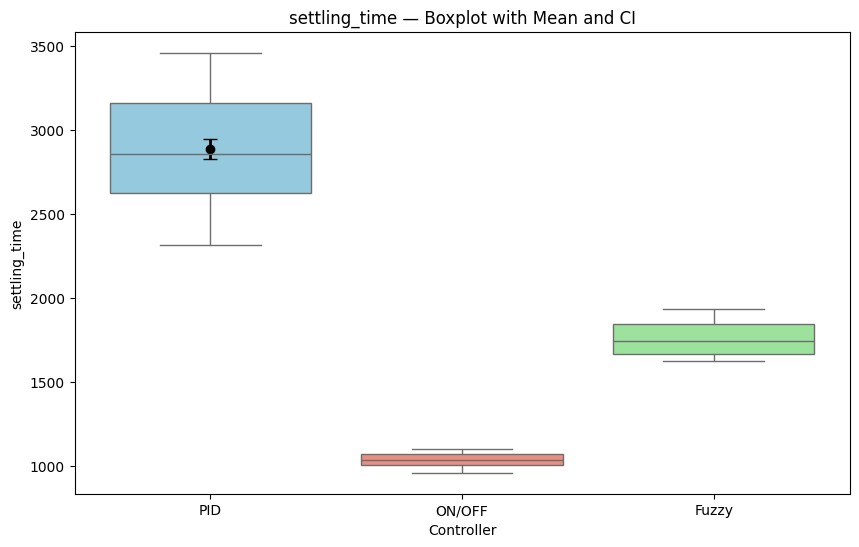

    controller  run        metric    value
500        PID    0  comfort_time  11938.0
501        PID    1  comfort_time  12086.0
502        PID    2  comfort_time  11145.0
503        PID    3  comfort_time  11524.0
504        PID    4  comfort_time  11123.0


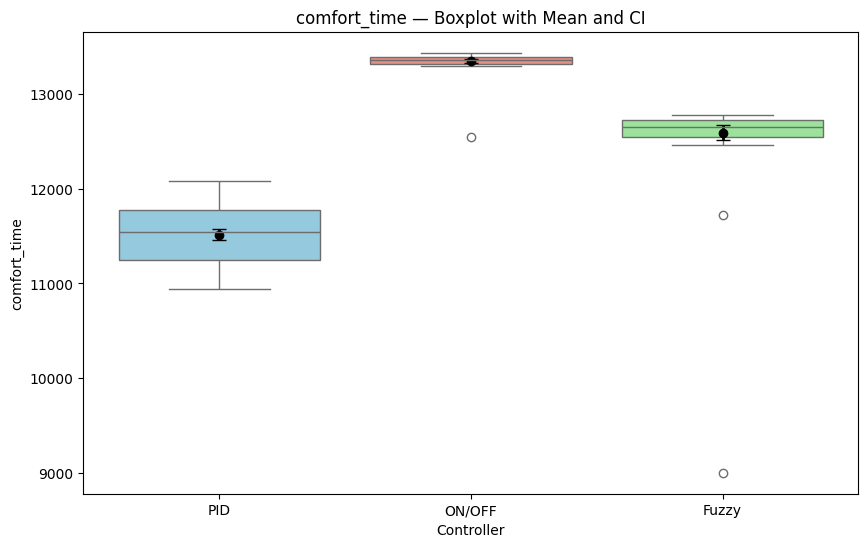

    controller  run           metric     value
600        PID    0  energy_consumed  0.526569
601        PID    1  energy_consumed  0.470041
602        PID    2  energy_consumed  1.040254
603        PID    3  energy_consumed  0.768639
604        PID    4  energy_consumed  1.032549


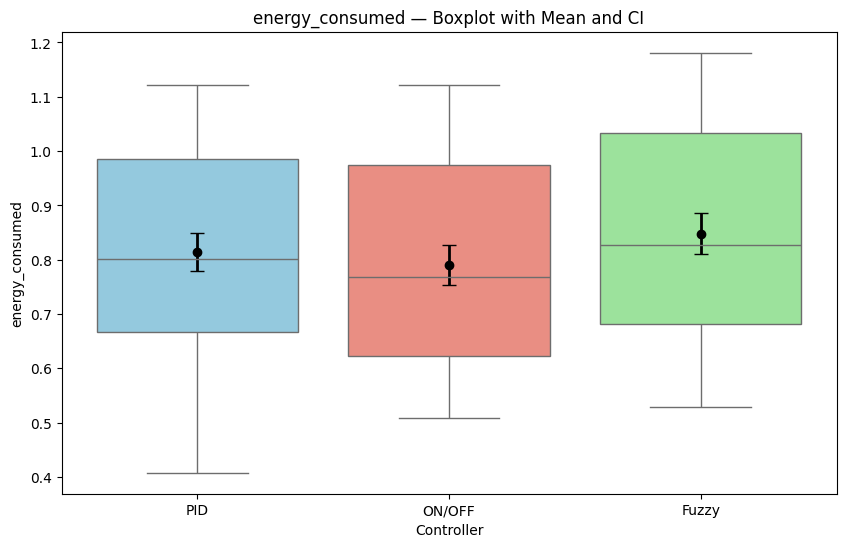

    controller  run                   metric     value
700        PID    0  variance_after_settling  0.023198
701        PID    1  variance_after_settling  0.021061
702        PID    2  variance_after_settling  0.011315
703        PID    3  variance_after_settling  0.019814
704        PID    4  variance_after_settling  0.012587


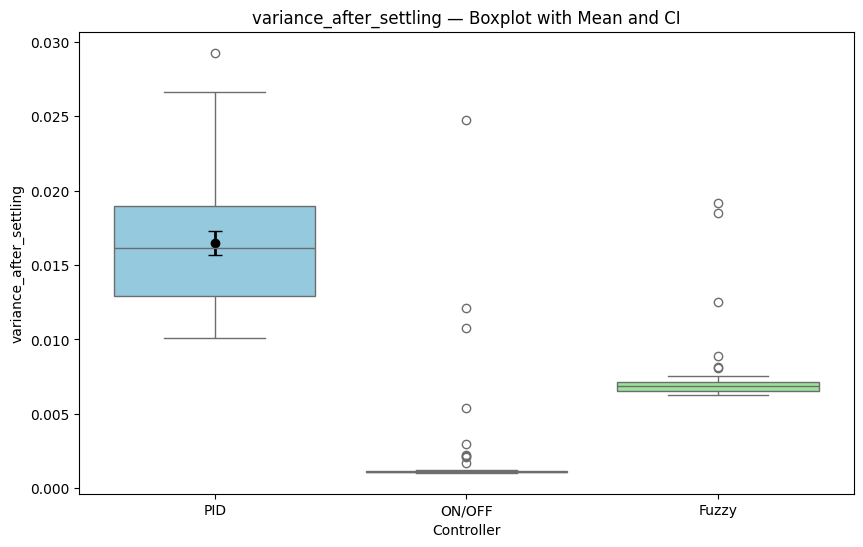

Empty DataFrame
Columns: [controller, run, metric, value]
Index: []


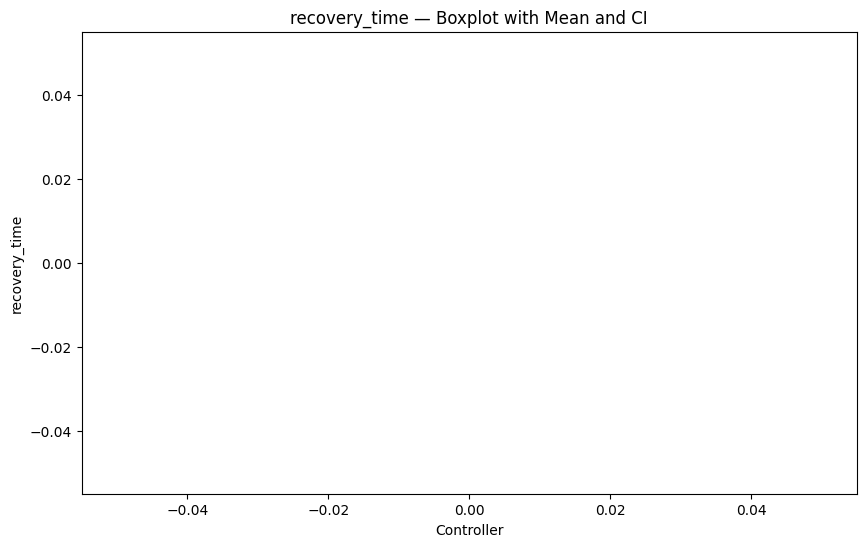

    controller  run                  metric  value
900        PID    0  number_of_oscillations    1.0
901        PID    1  number_of_oscillations    1.0
902        PID    2  number_of_oscillations    0.0
903        PID    3  number_of_oscillations    1.0
904        PID    4  number_of_oscillations    0.0


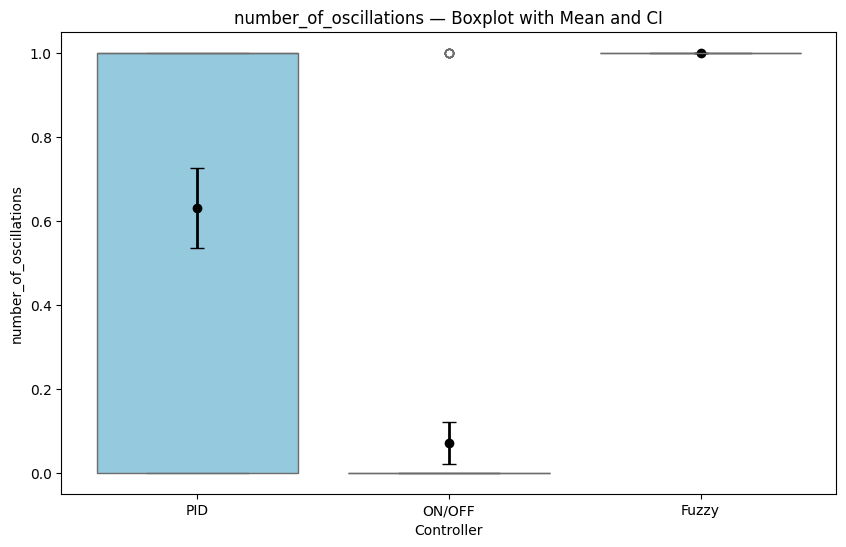

In [7]:
metrics = results['metric'].unique()


for metric in metrics:
    plt.figure(figsize=(10, 6))

    
    # Filter data
    metric_results = results[results['metric'] == metric]
    metric_results_clean = metric_results.dropna(subset=['value'])
    print(metric_results_clean.head())
    metric_summary = summary_stats[summary_stats['metric'] == metric]

    #print types of columns
     #print(metric_results_clean.dtypes)

    # Draw boxplot
    ax = sns.boxplot(
        data=metric_results_clean,
        x='controller', y='value',
        palette=palette,
        hue='controller',
        showmeans=False
    )

    # Add mean + CI overlay
    for i, row in metric_summary.iterrows():
        x_pos = ['PID', 'ON/OFF', 'Fuzzy'].index(row['source'])

        # Mean as black dot
        ax.plot(x_pos, row['mean'], 'o', color='black')

        # CI for mean
        ax.errorbar(x=x_pos, y=row['mean'],
                   yerr=[[row['mean'] - row['mean_ci_lower']], [row['mean_ci_upper'] - row['mean']]],
                    fmt='none', ecolor='black', capsize=5, lw=2)

        # Annotate variance and its CI
        #var_text = f"σ²={row['var']:.3g}\nCI=({row['var_ci_lower']:.3g}, {row['var_ci_upper']:.3g})"
        #ax.text(x_pos, ax.get_ylim()[1] * 0.95, var_text,
           #     ha='center', va='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

    plt.title(f"{metric} — Boxplot with Mean and CI")
    plt.xlabel("Controller")
    plt.ylabel(metric)
    #plt.grid(True, linestyle='--', alpha=0.5)
   # plt.tight_layout()
    plt.show()
